### <p style="text-align: right;"> Alexis Guevara

# Linear Scalar Advection Equation

## Preliminary

In [4]:
# Please keep the following two command lines to generate the animation
from IPython.display import display, clear_output
import time  

import numpy as np
import matplotlib.pyplot as plt

## Linear advection equation

Seek a numerical solution of 

\begin{equation}
       \partial_t u + \partial_x u = 0, 
\end{equation}

in the domain $\Omega = [-1,1]$ and a time interval $[0,T]$. The initial and boundary conditions are 
    
\begin{equation}
    \begin{aligned}
        u(x,0) =&\,\, g(x),\\
        u(-1,t) =&\,\, u(1,t).
    \end{aligned}
\end{equation}

**Task 1**

Create a function `my_fdtd` that computes a numerical solution using the finite difference method 

\begin{equation*}
    u_j^{n+1} = u_{j}^n - \Delta t \frac{u_{j+1}^n - u_{j-1}^n}{2h} + \Delta t^2 \frac{u_{j+1}^n - 2u_j^n + u_{j-1}^n}{2h^2}.
\end{equation*}

Here $\Delta t$ is the time step size and $h$ is the mesh size. The inputs are the mesh size, the CFL constant, the endpoints of $\Omega$, the final time $T$, the Python function `initial_cdn` that computes the initial data and a logic variable `is_movie` (true if you want to visualize the evolution of the numerical solution; otherwise false). The outputs are a vector containing the $x$ coordinates, the computed final time and the numerical solution at $T$.

In [7]:
def my_fdtd(h,cfl,Omega,T,initial_cdn,is_movie):
    x = np.arange(Omega[0], Omega[1]+h, h) # Define x coordinates
    dt = cfl * h                           # Define time step size

    u = initial_cdn(x) # Initialize solution w/ initial condition
    u_old = np.copy(u) # Initialize solution at previous time step
    
    # Animate Solution
    if is_movie:
        fig = plt.figure(figsize=(5,5))
        plt.plot(x, u)
        plt.xlim(min(x), max(x))
        plt.ylim(-1,1)
        plt.xlabel('$x$')
        plt.ylabel('approximation of $u$')
        plt.title('time '+format(0, '.2f'))
        time.sleep(0.5)
        clear_output(wait=True)
        display(fig)
        fig.clear()

    t = 0
    while t < T:
        # Finite Difference Method
        u[1:-1] = u_old[1:-1] - (dt)*(u_old[2:] - u_old[:-2]) / (2*h) + (dt**2)*(u_old[2:] - 2*u_old[1:-1] + u_old[:-2]) / (2*h**2)

        # Apply boundary conditions
        u[0] = u[-2]
        u[-1] = u[-1]

        u_old = np.copy(u) # Update solution at previous time step
        t += dt            # Update time
        
        # Animate Solution
        if is_movie:
            plt.plot(x, u)
            plt.xlim(min(x), max(x))
            plt.ylim(-1,1)
            plt.xlabel('$x$')
            plt.ylabel('approximation of $u$')
            plt.title('time '+format(t, '.2f'))
            time.sleep(0.5)
            clear_output(wait=True)
            display(fig)
            fig.clear()

    return x, t, u

**Task 2**

Perform a convergence plot using the initial condition 

$$g(x) = e^{-\frac{x^2}{\sigma^2}}$$

with $\sigma = 0.01$, $\Delta t = 0.5 h$, $h=2^{-k}$ for $k=5,\dots,14$, and $T=2$. According to your numerical results, what is the order of the method?

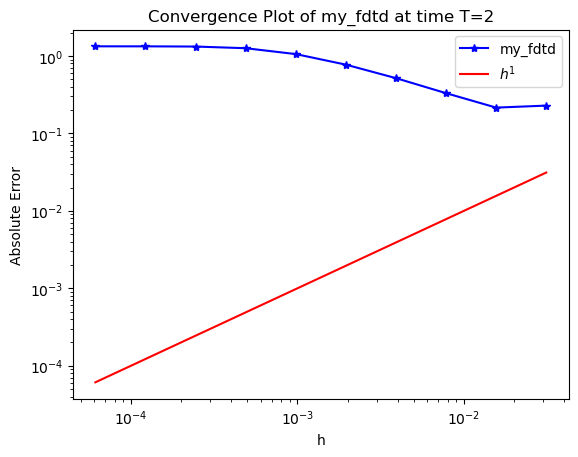

In [9]:
# Define initial condition
def initial_cdn(x):
    sigma = 0.01
    return np.exp(-x**2 / sigma**2)

# Define parameters
cfl = 0.5
Omega = [-1, 1]
T = 2
is_movie = False

# Define k range
k_1 = 5
k_f = 15

# Initialize errors & h values
errors   = np.zeros(k_f-k_1)
h_values = np.zeros(k_f-k_1)

for k in range(k_1,k_f):
    # Mesh Size
    h = 2.0**-k
    h_values[k-k_1] = h
    
    # Finite Difference Method
    x, t, u = my_fdtd(h,cfl,Omega,T,initial_cdn,is_movie)
    
    u_exact = initial_cdn(x - t)                         # Compute exact solution
    errors[k-k_1] = np.max(np.abs(u - u_exact))          # Compute errors

# Plot Convergence oF Finite Difference Method
plt.loglog(h_values, errors, label='my_fdtd',color="blue",marker="*",linestyle="-")
plt.loglog(h_values, h_values**1.0, label="$h^{1}$",color="red",linestyle="-")
plt.legend()
plt.title("Convergence Plot of my_fdtd at time T=2")
plt.xlabel("h")
plt.ylabel("Absolute Error")
plt.show()

According to my numerical results, the order of the method is 1.

## Analysis of the Finite-Difference Method

**Task 1**

Is the finite difference method consistent?

Consider the finite difference method:

\begin{equation}
    u_j^{n+1} = u_{j}^n - \Delta t \frac{u_{j+1}^n - u_{j-1}^n}{2h} + \Delta t^2 \frac{u_{j+1}^n - 2u_j^n + u_{j-1}^n}{2h^2}.
\end{equation}


The local truncation error for the method is:

\begin{equation}
    \begin{aligned}
        L_{\Delta t}(x,t) =&\,\, \frac{1}{\Delta t} \left( u_j^{n+1} - u_{j}^n + \Delta t \frac{u_{j+1}^n - u_{j-1}^n}{2h} - \Delta t^2 \frac{u_{j+1}^n - 2u_j^n + u_{j-1}^n}{2h^2} \right) \\
        L_{\Delta t}(x,t) =&\,\, \frac{u_j^{n+1} - u_{j}^n}{\Delta t}  + \frac{u_{j+1}^n - u_{j-1}^n}{2h} - \Delta t \frac{u_{j+1}^n - 2u_j^n + u_{j-1}^n}{2h^2}
    \end{aligned}
\end{equation}

Consider the following Taylor series expansions:

\begin{equation}
    \begin{aligned}
    u_{j}^{n+1} =&\,\, u(x,t+\Delta t) = u(x,t) + \partial_t u(x,t) \Delta t + \frac{\partial_t^2 u(x,\xi_1) \Delta t^2}{2} \text{ for $\xi_1$ between $t$ and $t+\Delta t$} \\
    u_{j+1}^{n} =&\,\, u(x+h,t) = u(x,t) + \partial_x u(x,t) h + \frac{\partial_x^2 u(x,t) h^2}{2} + \frac{\partial_x^3 u(x,t) h^3}{6} + \frac{\partial_x^4 u(\xi_2,t) h^4}{24} \text{ for $\xi_2$ between $x$ and $(x+h)$} \\
    u_{j-1}^{n} =&\,\, u(x-h,t) = u(x,t) - \partial_x u(x,t) h + \frac{\partial_t^2 u(x,t) h^2}{2} - \frac{\partial_x^3 u(x,t) t^3}{6} + \frac{\partial_x^4 u(\xi_3,t) h^4}{24} \text{ for $\xi_3$ between $(x-h)$ and $x$} \\
    \end{aligned}
\end{equation}


Using the Taylor series expansions:

\begin{equation}
    \begin{aligned}
        \frac{u_j^{n+1} - u_{j}^n}{\Delta t} =&\,\, \frac{u(x,t) + \partial_t u(x,t) \Delta t + \frac{\partial_t^2 u(x,\xi_1) \Delta t^2}{2} - u(x,t)}{\Delta t}\\
        \frac{u_j^{n+1} - u_{j}^n}{\Delta t} =&\,\, \partial_t u(x,t) + \frac{\partial_t^2 u(x,\xi_1) \Delta t}{2} \text{ for $\xi_1$ between $t$ and $(t+\Delta t)$}
    \end{aligned}
\end{equation}

\begin{equation}
    \begin{aligned}
        \frac{u_{j+1}^n - u_{j-1}^n}{2h} =&\,\, \frac{\left( u(x,t) + \partial_x u(x,t) h + \frac{\partial_x^2 u(x,t) h^2}{2} + \frac{\partial_x^3 u(\xi_{23},t) h^3}{6} \right) - \left(u(x,t) - \partial_x u(x,t) h + \frac{\partial_t^2 u(x,t) h^2}{2} - \frac{\partial_x^3 u(\xi_{23},t) t^3}{6} \right)}{2h} \\
        \frac{u_{j+1}^n - u_{j-1}^n}{2h} =&\,\, \partial_x u(x,t) + \frac{\partial_x^3 u(\xi_{23},t) h^2}{6} \text{ for $\xi_{23}$ between $(x-h)$ and $(x+h)$}
    \end{aligned}
\end{equation}

\begin{equation}
    \begin{aligned}
        \frac{u_{j+1}^n - 2u_j^n + u_{j-1}^n}{2h^2} =&\,\, \frac{ \left(u(x,t) + \partial_x u(x,t) h + \frac{\partial_x^2 u(x,t) h^2}{2} + \frac{\partial_x^3 u(x,t) h^3}{6} + \frac{\partial_x^4 u(\xi_{23},t) h^4}{24} \right) -2u(x,t) + \left(u(x,t) - \partial_x u(x,t) h + \frac{\partial_t^2 u(x,t) h^2}{2} - \frac{\partial_x^3 u(x,t) t^3}{6} + \frac{\partial_x^4 u(\xi_{23},t) h^4}{24}\right)}{2h^2} \\
        \frac{u_{j+1}^n - 2u_j^n + u_{j-1}^n}{2h^2} =&\,\, \frac{\partial_x^2 u(x,t)}{2} + \frac{\partial_x^4 u(\xi_{23},t) h^2}{24} \text{ for $\xi_{23}$ between $(x-h)$ and $(x+h)$}
    \end{aligned}
\end{equation}

Altogether, we get

\begin{equation}
    \begin{aligned}
        L_{\Delta t}(x,t) =&\,\, \partial_t u(x,t) + \frac{\partial_t^2 u(x,\xi_{1}) \Delta t}{2} + \partial_x u(x,t) + \frac{\partial_x^3 u(\xi_{23},t) h^2}{6} - \Delta t \left(\frac{\partial_x^2 u(x,t)}{2} + \frac{\partial_x^4 u(\xi_{23},t) h^2}{24} \right) \\
        L_{\Delta t}(x,t) =&\,\, \partial_t u(x,t) + \partial_x u(x,t) + \frac{\partial_t^2 u(x,\xi_{1}) \Delta t}{2} + \frac{\partial_x^3 u(\xi_{23},t) h^2}{6} - \frac{\partial_x^2 u(x,t) \Delta t}{2} - \frac{\partial_x^4 u(\xi_{23},t) h^2 \Delta t}{24}
    \end{aligned}
\end{equation}

Since  $\partial_t u(x,t) + \partial_x u(x,t) = 0$, we get

\begin{equation}
    \begin{aligned}
        L_{\Delta t}(x,t) =&\,\, \frac{\partial_t^2 u(x,\xi_{1}) \Delta t}{2} + \frac{\partial_x^3 u(\xi_{23},t) h^2}{6} - \frac{\partial_x^2 u(x,t) \Delta t}{2} - \frac{\partial_x^4 u(\xi_{23},t) h^2 \Delta t}{24}
    \end{aligned}
\end{equation}

From  $\partial_t u(x,t) + \partial_x u(x,t) = 0$, $\partial_t u(x,t) = - \partial_x u(x,t)$. Thus, we have

\begin{equation}
    \begin{aligned}
        \partial_t^2 u(x,t) =&\,\,   \partial_x^2 u(x,t)
    \end{aligned}
\end{equation}

We have

\begin{equation}
    \begin{aligned}
L_{\Delta t}(x,t) =&\,\, \frac{\partial_t^2 u(x,\xi_{1}) \Delta t}{2} + \frac{\partial_x^3 u(\xi_{23},t) h^2}{6} - \frac{\partial_x^2 u(x,t) \Delta t}{2} - \frac{\partial_x^4 u(\xi_{23},t) h^2 \Delta t}{24} \\
L_{\Delta t}(x,t) =&\,\, \frac{\partial_x^3 u(\xi_{23},t) h^2}{6} - \frac{\partial_x^4 u(\xi_{23},t) h^2 \Delta t}{24}
    \end{aligned}
\end{equation}

Considering $\frac{\Delta t}{h} = \lambda$, $h = \frac{\Delta t}{\lambda}$ and $h^2 = \frac{\Delta t^2}{\lambda^2}$, we have

\begin{equation}
    \begin{aligned}
        L_{\Delta t}(x,t) =&\,\, \frac{\partial_x^3 u(\xi_{23},t)}{6 \lambda^2}\Delta t^2 - \frac{\partial_x^4 u(\xi_{23},t)}{24 \lambda^2} \Delta t^3
    \end{aligned}
\end{equation}

Since $\partial_x^3 u(x,t)$ and $\partial_x^4 u(x,t)$ are uniformly bounded, $|\partial_x^3 u(x,t)| \leq C$, $\forall (x,t)$ and $|\partial_x^4 u(x,t)| \leq D$, $\forall (x,t)$

So $|L_{\Delta t}(x,t)| \leq \left( \frac{1}{6 \lambda^2}\right) C \Delta t^2 - \left( \frac{1}{24 \lambda^2} \right) D \Delta t^3$ and $ L_{\Delta t}(x,t) = O(\Delta t^2) $
  
Therefore, the method is consistent and second-order accurate locally.

**Task 2**

Using the Von Neumann analysis, is the finite difference method stable?


To apply von Neumann analysis, we consider how the finite difference method works on a single wave number.

Consider the discrete Fourier transform:

\begin{equation}
        u_j^{n} = \sum_{k=0}^{N-1} \hat{u}_k^{n} e^{ijhk} , j = 0,1,...,N-1
\end{equation}

We seek a form $\hat{u}_k^{n+1} = g(k) \hat{u}_k^{n}$.

From the finite difference method,

\begin{equation}
    \begin{aligned}
        u_j^{n+1} =&\,\, u_{j}^n - \Delta t \frac{u_{j+1}^n - u_{j-1}^n}{2h} + \Delta t^2 \frac{u_{j+1}^n - 2u_j^n + u_{j-1}^n}{2h^2} \\
        \sum_{k=0}^{N-1} \hat{u}_k^{n+1} e^{ijhk} =&\,\, \sum_{k=0}^{N-1} \hat{u}_k^{n} e^{ijhk} - \Delta t \frac{\sum_{k=0}^{N-1} \hat{u}_k^{n} e^{i(j+1)hk} - \sum_{k=0}^{N-1} \hat{u}_k^{n} e^{i(j-1)hk}}{2h} + \Delta t^2 \frac{\sum_{k=0}^{N-1} \hat{u}_k^{n} e^{i(j+1)hk} - 2\sum_{k=0}^{N-1} \hat{u}_k^{n} e^{ijhk} + \sum_{k=0}^{N-1} \hat{u}_k^{n} e^{i(j-1)hk}}{2h^2} \\
        \sum_{k=0}^{N-1} \hat{u}_k^{n+1} e^{ijhk} =&\,\, \sum_{k=0}^{N-1} \left( 1 - \frac{\Delta t}{2h} (e^{ihk} - e^{-ihk}) + \frac{\Delta t^2}{2h^2} (e^{ihk} - 2 + e^{-ihk}) \right) \hat{u}_k^{n} e^{ijhk} \\
    \end{aligned}
\end{equation}

So, for each $k$

\begin{equation}
        \hat{u}_k^{n+1} = \left( 1 - \frac{\Delta t}{2h} (e^{ihk} - e^{-ihk}) + \frac{\Delta t^2}{2h^2} (e^{ihk} - 2 + e^{-ihk}) \right) \hat{u}_k^{n} = g(k) \hat{u}_k^{n} \\
\end{equation}

We then require $|g(k)| \leq 1$ , $\forall k$

\begin{equation}
    \begin{aligned}
        \left| 1 - \frac{\Delta t}{2h} (e^{ihk} - e^{-ihk}) + \frac{\Delta t^2}{2h^2} (e^{ihk} - 2 + e^{-ihk}) \right| \leq 1 \\
        \left| 1 + \frac{\Delta t^2}{h^2} (\cos(hk) - 1) - \frac{\Delta t}{h} (i\sin(hk)) \right| \leq 1 \\
        \left( \left( 1 + \frac{\Delta t^2}{h^2} (\cos(hk) - 1) \right)^{2} + \left(\frac{\Delta t}{h} \sin(hk)\right)^{2} \right)^{\frac{1}{2}} \leq 1 \\
        \left( 1 + \frac{\Delta t^2}{h^2} (\cos(hk) - 1) \right)^{2} + \left(\frac{\Delta t}{h} \sin(hk)\right)^{2} \leq 1 \\
         1 + \frac{2 \Delta t^2}{h^2} (\cos(hk) - 1) + \frac{\Delta t^4}{h^4} (\cos(hk) - 1)^{2} + \frac{\Delta t^2}{h^2} \sin^{2}(hk) \leq 1 \\
        \frac{\Delta t^4}{h^4} (\cos(hk) - 1)^{2} + \frac{\Delta t^2}{h^2} (2 \cos(hk) - 2 + \sin^{2}(hk)) \leq 0 \\
        \frac{\Delta t^4}{h^4} (\cos(hk) - 1)^{2} + \frac{\Delta t^2}{h^2} \left(-4 \sin\left(\frac{hk}{2}\right)^{4}\right) \leq 0 \\
        \frac{\Delta t^4}{h^4} \left(4 \sin\left(\frac{hk}{2}\right)^{4}\right) + \frac{\Delta t^2}{h^2} \left(-4 \sin\left(\frac{hk}{2}\right)^{4}\right) \leq 0 \\
        4 \left( \sin\left(\frac{hk}{2}\right)^{4} \right) \left( \frac{\Delta t^{4}}{h^{4}} - \frac{\Delta t^{2}}{h^{2}} \right) \leq 0 \\
    \end{aligned}
\end{equation}

Since $4 \left( \sin\left(\frac{hk}{2}\right)^{4} \right) \geq 1$, $\forall k$, we require $\left( \frac{\Delta t^{4}}{h^{4}} - \frac{\Delta t^{2}}{h^{2}} \right) \leq 0$.

\begin{equation}
    \begin{aligned}
        \frac{\Delta t^{4}}{h^{4}} - \frac{\Delta t^{2}}{h^{2}} \leq 0 \\
        \frac{\Delta t^{2}}{h^{2}} \left( \frac{\Delta t^{2}}{h^{2}} - 1 \right) \leq 0 \\
        \frac{\Delta t^{2}}{h^{2}} - 1 \leq 0 \\
        \Delta t^{2} \leq h^{2} \\
    \end{aligned}
\end{equation}

Therefore, the method in **Part 1** is stable in 2-norm if $\Delta t \leq h$. 
Otherwise, if the condition is not met, the method is unstable.

**Task 3**

Provide numerical evidences of your results of **Task 1** and **Task 2**.

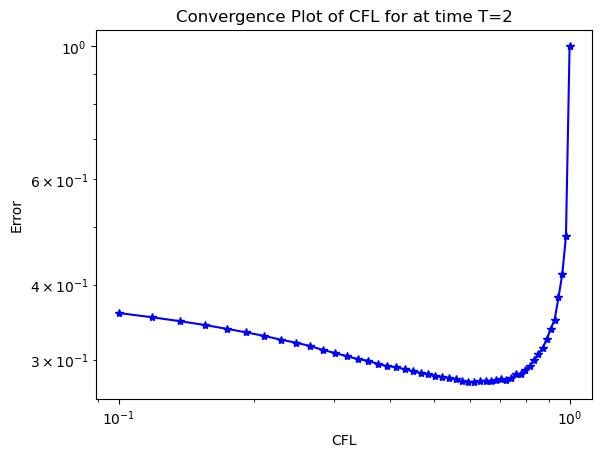

In [17]:
# EVIDENCE OF RESULTS OF **QUESTION 1**

# Goal: Observe value of norm of Local Truncation Error as \Delta t approaches 0
# If norm of Local Truncation Error approaches zero, the method is consistent
# else, method is inconsistent
# Through changing values of CFL, \Delta t is shown to approach 0

def initial_cdn(x):
    sigma = 0.01
    return np.exp(-x**2 / sigma**2)

# Define parameters
h = 0.01
cfl_values = np.linspace(1, 0.1, 50)
Omega    = [-1,1]
T        = 2
is_movie = False

# Define k range
k_1 = 5
k_f = 15

# Initialize errors
errors = []

for cfl in cfl_values:
    x, t, u = my_fdtd(h, cfl, Omega, T, initial_cdn, is_movie)

    u_exact = initial_cdn(x - t) # Compute exact solution
    error   = np.linalg.norm(u - u_exact, np.inf) # Compute errors
    errors.append(error) # Append errors 
    
# Plot Convergence
plt.loglog(cfl_values, errors,color="blue",marker="*",linestyle="-")
plt.title('Convergence Plot of CFL for at time T=2')
plt.xlabel('CFL')
plt.ylabel('Error')
plt.show()

In [18]:
# EVIDENCE OF RESULTS OF **QUESTION 2**

# Goal: Observe stability of finite difference method when \Delta t > h
# CFl is changed to be greater than 1 
# to show that the method is unstable when \Delta t > h

def initial_cdn(x):
    sigma = 0.01
    return np.exp(-x**2 / sigma**2)

# Define the parameters
CFL = 1.1  # Changed to have \Delta t > h
Omega = [-1, 1]
T = 2

is_movie = True

# Define k range
k_1 = 5
k_f = 15

# Animation displaying unstability of the method since \Delta t > h
#for k in range(k_1,k_f):
#    h = 2.0**-k  
#    x, t, u = my_fdtd(h, CFL, Omega, T, initial_cdn, is_movie)

**Task 4**

Using the function `my_fdtd`, visualize the evolution of $T=8$ with $h \in \{0.05,0.025,0.01\}$. Describe your results and provide three figures showing the numerical approximation at the final time $T$, one for each mesh size. 

**Note that you need to include all the code that you use to answer the question. That being said, you will comment it when you will generate the PDF file of your programming assignment to avoid to re-run the simulations.**

In [20]:
def initial_cdn(x):
    sigma = 0.01
    return np.exp(-x**2 / sigma**2)

# Define parameters
cfl   = 0.5
Omega = [-1, 1]
T     = 8
is_movie = True

In [21]:
#x, t, u = my_fdtd(0.05,cfl,Omega,T,initial_cdn,is_movie)

In [22]:
#x, t, u = my_fdtd(0.025,cfl,Omega,T,initial_cdn,is_movie)

In [23]:
#x, t, u = my_fdtd(0.01,cfl,Omega,T,initial_cdn,is_movie)

Within the visualizations of the numerical approximations at the final time T, the initial condition of the linear advection equation seems to be stretched out for larger mesh size h and tends to stay close to the shape of the initial condition for smaller values of h. 

Since higher values of the mesh size h lead to less accurate approximations of the PDE, the initial condition seems to lose detail of the initial condition at the final time T in comparison to approximations of the PDE with smaller mesh sizes, which keep more detail of the initial condition at the final time T.